In [82]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.linear_model import LinearRegression
from scipy import stats

In [83]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

In [84]:
df = pd.read_csv('train.csv', index_col = 0)
Trainy = df.Life_expectancy
df = pd.read_csv('test.csv', index_col = 0)
Testy = df.Life_expectancy

TrainX1 = genfromtxt('LR_Train_P.csv', delimiter=',')
TrainX2 = genfromtxt('KNN_Train_P.csv', delimiter=',')
TrainX3 = genfromtxt('DT_Train_P.csv', delimiter=',')
TrainX = []
for i in range(len(TrainX1)):
    TrainX.append([])
    TrainX[i].append(TrainX1[i])
    TrainX[i].append(TrainX2[i])
    TrainX[i].append(TrainX3[i])
TrainX = np.asarray(TrainX)

TestX1 = genfromtxt('LR_Test_P.csv', delimiter=',')
TestX2 = genfromtxt('KNN_Test_P.csv', delimiter=',')
TestX3 = genfromtxt('DT_Test_P.csv', delimiter=',')
TestX = []
for i in range(len(TestX1)):
    TestX.append([])
    TestX[i].append(TestX1[i])
    TestX[i].append(TestX2[i])
    TestX[i].append(TestX3[i])
TestX = np.asarray(TestX)

In [85]:
reg = LinearRegression().fit(TrainX, Trainy)
Predict = reg.predict(TrainX)
intercept = reg.intercept_ 
print(reg.coef_,intercept)

[0.20762618 0.46715629 0.4077386 ] -5.890751080656003


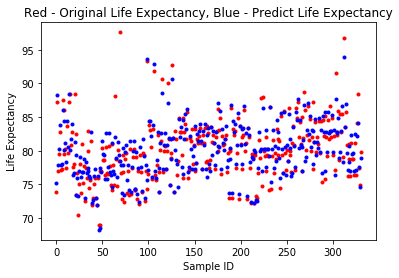

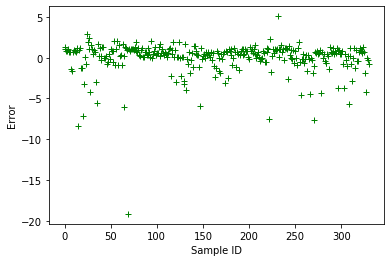

DescribeResult(nobs=331, minmax=(0.004478723770944271, 19.151473932402467), mean=1.1461603226928534, variance=2.4905206231409767, skewness=5.893149709153466, kurtosis=53.62070601527318)

In [86]:
Trainy = Trainy.to_numpy()
PCAerrorlist, PCA_abs_errorlist = errorCalculate(Trainy,Predict)
plt.plot(Trainy, 'r.')
plt.plot(Predict, 'b.')

plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
plt.show()

plt.plot(PCAerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(PCA_abs_errorlist)

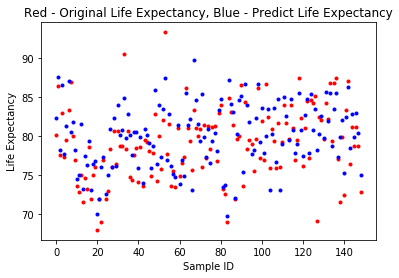

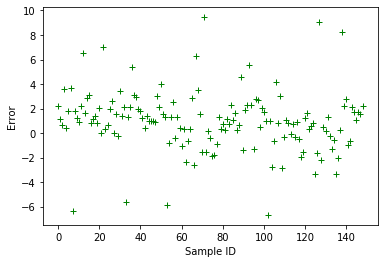

DescribeResult(nobs=149, minmax=(0.00971031580220938, 9.447391857021671), mean=1.9442643552105496, variance=3.1676420594271617, skewness=1.9851630636492907, kurtosis=4.35060419605784)

In [87]:
Testy = Testy.to_numpy()
Predict = reg.predict(TestX)
plt.plot(Testy, 'r.')
plt.plot(Predict, 'b.')
plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
plt.show()

PCAerrorlist, PCA_abs_errorlist = errorCalculate(Testy,Predict)
plt.plot(PCAerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(PCA_abs_errorlist)